Ejercicios básicos de procesamiento de imágenes

In [8]:
'''1. Abrir y escribir una imagen a un archivo '''

'1. Abrir y escribir una imagen a un archivo '

In [9]:
from scipy import misc
import imageio.v2 as io 
import matplotlib.pyplot as plt

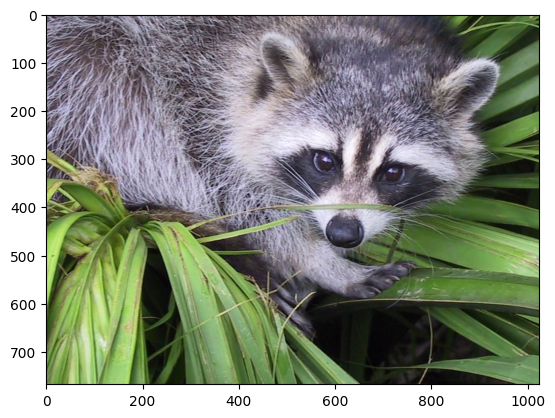

In [10]:
f = misc.face()
io.imwrite('Resources/face.png', f)
plt.imshow(f)
plt.show()

In [11]:
'''2. Creación de un arreglo numpy de un archivo de imagen'''

'2. Creación de un arreglo numpy de un archivo de imagen'

In [13]:
face = misc.face()
io.imwrite('Resources/face.png', face) # Se salva la imagen como png
face = io.imread('face.png') # Se lee la imagen pgn
print(type(face))
face.shape, face.dtype

<class 'imageio.core.util.Array'>


((768, 1024, 3), dtype('uint8'))

In [ ]:
'''3. Abrir archivos raw '''

In [14]:
import numpy as np

In [18]:
face.tofile('Resources/face.raw') # Se crea el archivo raw binario
face_from_raw = np.fromfile('face.raw', dtype=np.uint8)
print(face_from_raw.shape)
face_from_raw.shape = (768, 1024, 3)

(2359296,)


In [ ]:
'''4. Despliegue de imágenes '''

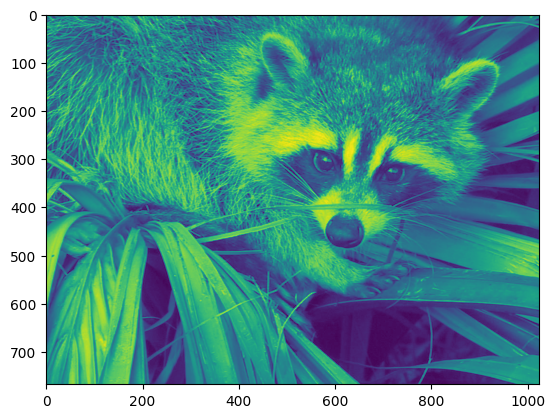

In [22]:
f = misc.face(gray=True) # Lee la imagen en escala de grises
plt.imshow(f)

In [24]:
print(f'Forma BW: {f.shape}')
print(f'Forma RGB: {face.shape}') 

Forma BW: (768, 1024)
Forma RGB: (768, 1024, 3)


(-0.5, 1023.5, 767.5, -0.5)

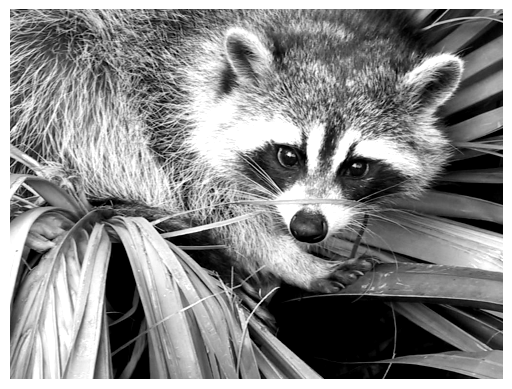

In [25]:
plt.imshow(f, cmap=plt.cm.gray, vmin=30, vmax=200)
# Remueve los ejes y las marcas (ticks)
plt.axis('off')

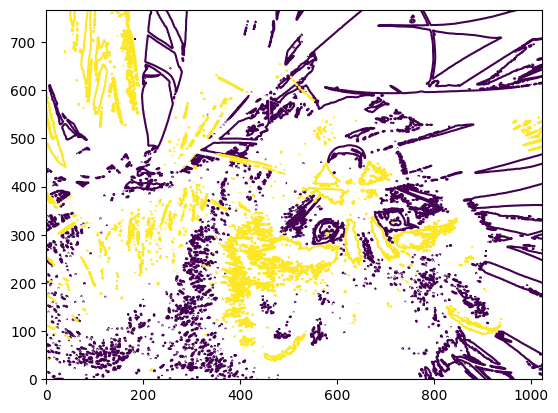

In [26]:
plt.contour(f, [50, 200]) 

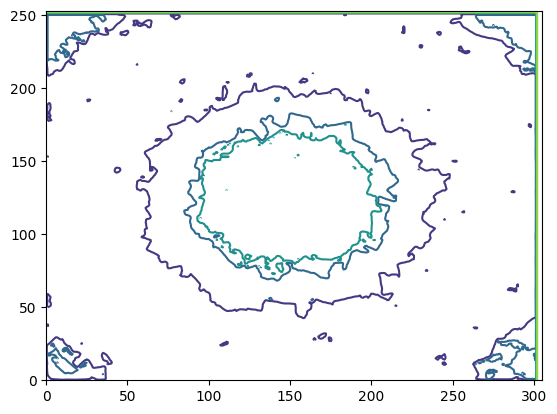

In [51]:
f = io.imread('Resources/contour_gray.png', as_gray=True)
plt.contour(f, 5)

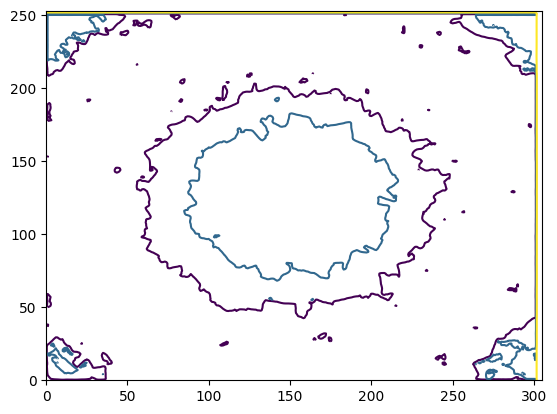

In [52]:
plt.contour(f, [50, 100, 200])

In [ ]:
'''5. Manipulaciones básicas'''

In [53]:
# Obtiene el valor de un pixel de la imagen
face = misc.face(gray=True)
face[0, 40]

127

In [58]:
# Accesando secciones de la imagen
face[10:13, 20:23]
face[100:120] = 255

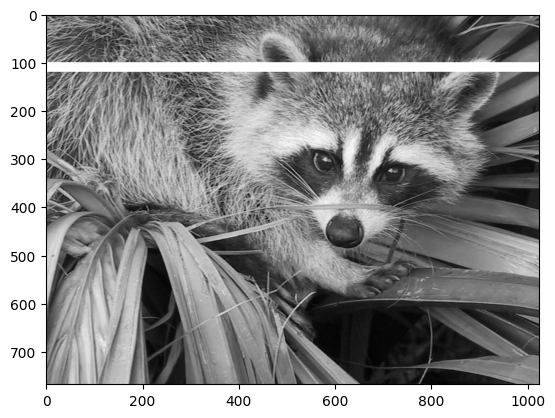

In [59]:
plt.imshow(face, cmap = plt.cm.gray)

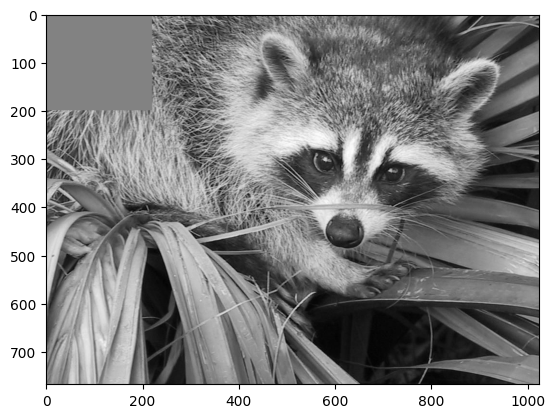

In [73]:
# Accesando secciones de la imagen
face = misc.face(gray=True)
face[:200 , :220] = 127
plt.imshow(face, cmap = plt.cm.gray)

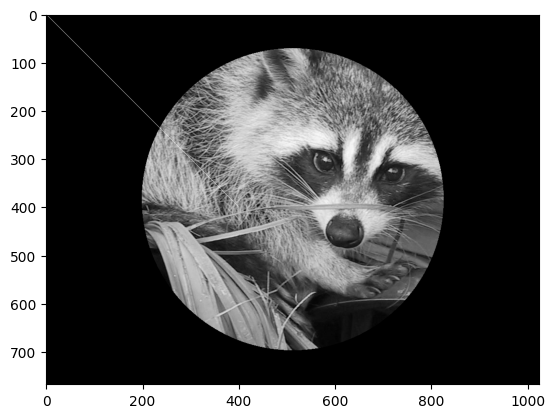

In [80]:
lx, ly = face.shape
X, Y = np.ogrid[0:lx, 0:ly]
mask = (X - lx / 2) ** 2 + (Y - ly / 2) ** 2 > lx * ly / 8
# Masks
face[mask] = 0
# Indexado con rangos
face[range(400), range(400)] = 255
plt.imshow(face, cmap = plt.cm.gray)

Información Estadística

In [81]:
face = misc.face(gray=True)
face.mean()
face.max(), face.min()

(250, 0)

<BarContainer object of 64 artists>

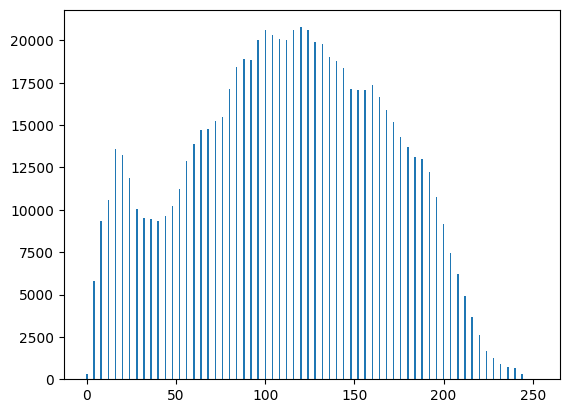

In [84]:
hist, bins = np.histogram(face, bins=64, range=(0,256))
plt.bar(bins[0:-1], hist)

Transformaciones geométricas

In [109]:
from scipy.ndimage import rotate

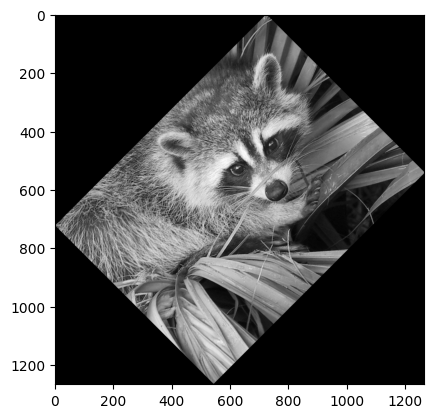

In [114]:
face = misc.face(gray=True)
lx, ly = face.shape
# Recorte
crop_face = face[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down Voltear verticalmente
flip_ud_face = np.flipud(face)
# Rotación
rotate_face = rotate(face, 45)
rotate_face_noreshape = rotate(face, 45, reshape=False)
plt.imshow(rotate_face, cmap = plt.cm.gray)


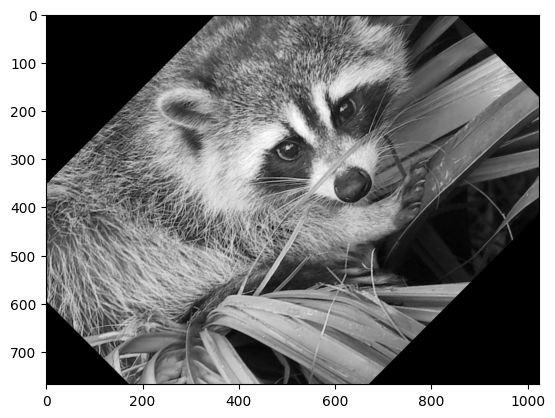

In [107]:
plt.imshow(rotate_face_noreshape, cmap = plt.cm.gray)

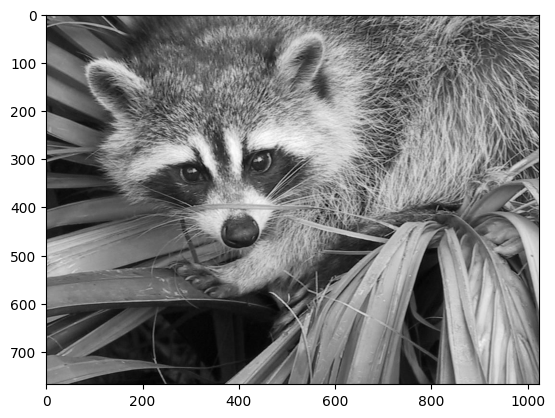

In [148]:
face = misc.face(gray=True)
lx, ly = face.shape
# Recorte
crop_face = face[lx // 4: - lx // 4, ly //4: - ly // 4]
flip_lr_face = np.fliplr(face)
plt.imshow(flip_lr_face, cmap = plt.cm.gray)